<a href="https://colab.research.google.com/github/hsuemily/CE888_Hsu-Chi-Rou_1900759/blob/master/Assignment/Dataset2_Adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library

In [0]:
# Import library
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2.  Load Dataset

In [0]:
# Load data
# Colab library to upload files to notebook, Ref:https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Load data from Kaggle to Google Colab virtual machine
os.environ['KAGGLE_USERNAME'] = "emilyhsucr" # username from the json file
os.environ['KAGGLE_KEY'] = "3b6aa5aa02b468c89e4cfac52a5d992e" # key from the json file
!kaggle competitions download -c porto-seguro-safe-driver-prediction # api copied from kaggle

  0% 0.00/2.12M [00:00<?, ?B/s]
100% 2.12M/2.12M [00:00<00:00, 71.9MB/s]
 92% 41.0M/44.4M [00:01<00:00, 22.2MB/s]
100% 44.4M/44.4M [00:01<00:00, 35.4MB/s]
 57% 17.0M/30.0M [00:00<00:00, 51.6MB/s]
100% 30.0M/30.0M [00:00<00:00, 75.7MB/s]


In [0]:
# Adult
# Add the colume name and drop first row, Ref:https://datascience.stackexchange.com/questions/45314/dataframe-has-no-column-names-how-to-add-a-header 
Adult = pd.read_csv("https://raw.githubusercontent.com/hsuemily/CE888_Hsu-Chi-Rou_1900759/master/Assignment/adult_train.csv", delimiter = ",",names=['age', 'workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income' ])
Adult = Adult.drop([0],axis=0)


In [0]:
Adult.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [0]:
Adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 2.0+ MB


## 3. Data Visualization

Class <=50K: 12435
Class >50K: 3846
Imbalance rate: 76.38 %


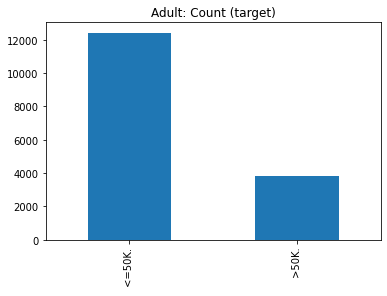

In [0]:
# Plot histogram of the label income in Adult dataset
pd.Series(Adult['income']).value_counts().plot(kind='bar',title='Adult: Count (target)')
target_count = Adult.income.value_counts()
print('Class <=50K:', target_count[0])
print('Class >50K:', target_count[1])
print('Imbalance rate:', round((target_count[0] / (target_count[0]+target_count[1]))*100, 2), '%')

## 4. Data Preprocessing
 - 4.1 Missing Value
 - 4.2 Normalization
 - 4.3 Lable encoding or one hot encoding

### 4.1 Missing Value

In [0]:
# dealing with missing value

#*****Adult
total = Adult.isnull().sum().sort_values(ascending=False)
# summarize the amount of missing value in each attributes, and then sort it by descending order
# percent = the counts of missing value /the counts of item (in each attribute)
percent = (Adult.isnull().sum()/Adult.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
income,0,0.0
native-country,0,0.0
hours-per-week,0,0.0
capital-loss,0,0.0
capital-gain,0,0.0


### 4.2 Normalization

In [0]:
# Normalize dataset - Adult
Adult_copy = Adult.copy()
for col in Adult_copy.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    Adult_copy[col] = mms.fit_transform(Adult_copy[[col]])
Adult_copy.describe()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,0.119130,0.604860,0.010819,0.023315,0.401962
std,0.071579,0.171170,0.075840,0.106924,0.127340
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.069906,0.533333,0.000000,0.000000,0.397959
50%,0.111272,0.600000,0.000000,0.000000,0.397959
75%,0.152272,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.3 Lable encoding or one hot encoding

In [0]:
# Using one hot encoding in Titanic and Adult dataset
# Ref: https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
Adult_copy = onehotencoder.fit_transform(Adult_copy).toarray()

print("Adult:", Adult_copy)
print(Adult_copy.shape)

Adult: [[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(16281, 13263)


## 5. Supervised Learning
### 5.1 Decesion tree (cross-validation)
### 5.2 Random forest (cross-validation)